<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/18_Regression_Trees_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

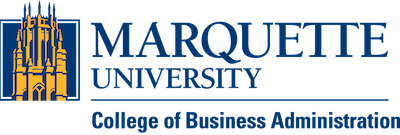

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Regression Trees Using R

Instructor: Dr. Badar Al Lawati

The algorithm for decision trees supports hyperparameter tuning
using the k-fold cross-validation method; therefore, we partition the
dataset into two parts:
* The training set is used to create one or
more models,
* The validation set (referred to as the test set to
be consistent with the term used in Python packages) is employed
to assess model performance in unseen data

In this case, we split
the data in the Balance_Data worksheet into two segments: 70%
for training and 30% for test, and then apply the 10-fold crossvalidation
technique to identify the tree with optimal complexity.

In [1]:
# Import the excel file into Colab

install.packages("readxl")
library(readxl)

myData <- read_excel("/content/Balance.xlsx", sheet = "Balance_Data")
myData

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Age,Sex,Income,Balance
<dbl>,<chr>,<dbl>,<dbl>
38,Female,60000,3250
20,Male,41000,3546
20,Female,134000,1094
29,Female,93000,5593
27,Female,47000,264
35,Female,10000,1146
51,Female,148000,10202
51,Female,112000,2805
30,Female,161000,8150


Install and load the caret, rpart, rpart.plot, and forecast packages
using the following command if you have not already done so

In [2]:
# Install necessary packages

install.packages("caret")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("forecast")

library(caret)
library(rpart)
library(rpart.plot)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Loading required package: ggplot2

Loading required package: lattice

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



By setting the random seed to 1, we will generate the same
partitions as shown in this example.


We use the
createDataPartition function to randomly allocate 70% of the
data into the training data set and 30% into the validation data
set

In [3]:
set.seed(1)
myIndex <- createDataPartition(myData$Balance, p=0.7, list = FALSE)
trainSet <- myData[myIndex,]
validationSet <- myData[-myIndex,]

We use the rpart function to generate the default regression tree
labeled default_tree.

Within the rpart function, we specify the
model structure, data source, and method.

The method = “anova”
option tells the function to build a regression tree for the
numerical target variable.

To view the details of the default tree,
use the summary function. To ensure consistency of the crossvalidation
results, we use the set.seed function to fix the random
seed to 1

In [4]:
set.seed(1)
default_tree <- rpart(Balance ~ ., data=trainSet, method = "anova")
summary(default_tree)

Call:
rpart(formula = Balance ~ ., data = trainSet, method = "anova")
  n= 352 

          CP nsplit rel error    xerror      xstd
1 0.21384225      0 1.0000000 1.0012080 0.1825519
2 0.09141359      1 0.7861577 0.9060736 0.1892481
3 0.02596401      2 0.6947442 0.7759332 0.1740343
4 0.01794368      3 0.6687801 0.7872376 0.1690312
5 0.01591714      5 0.6328928 0.7946220 0.1703249
6 0.01194553      6 0.6169757 0.7873988 0.1699588
7 0.01000000      7 0.6050301 0.7983662 0.1691387

Variable importance
Income    Age 
    76     24 

Node number 1: 352 observations,    complexity param=0.2138423
  mean=6672, MSE=5.246559e+07 
  left son=2 (165 obs) right son=3 (187 obs)
  Primary splits:
      Income < 76500  to the left,  improve=0.213842300, (0 missing)
      Age    < 21.5   to the left,  improve=0.049945670, (0 missing)
      Sex    splits as  LR,         improve=0.005944861, (0 missing)
  Surrogate splits:
      Age < 46.5   to the right, agree=0.582, adj=0.109, (0 split)

Node number 2: 

To view the regression tree visually, we use the prp function. The
type option is set equal to 1 so that all nodes except the leaf
nodes are labeled in the tree diagram

The extra option is set
equal to 1 so that the number of observations that fall into each
node is displayed

The under option is set equal to TRUE in order to put the number of cases under each decision node in
the diagram

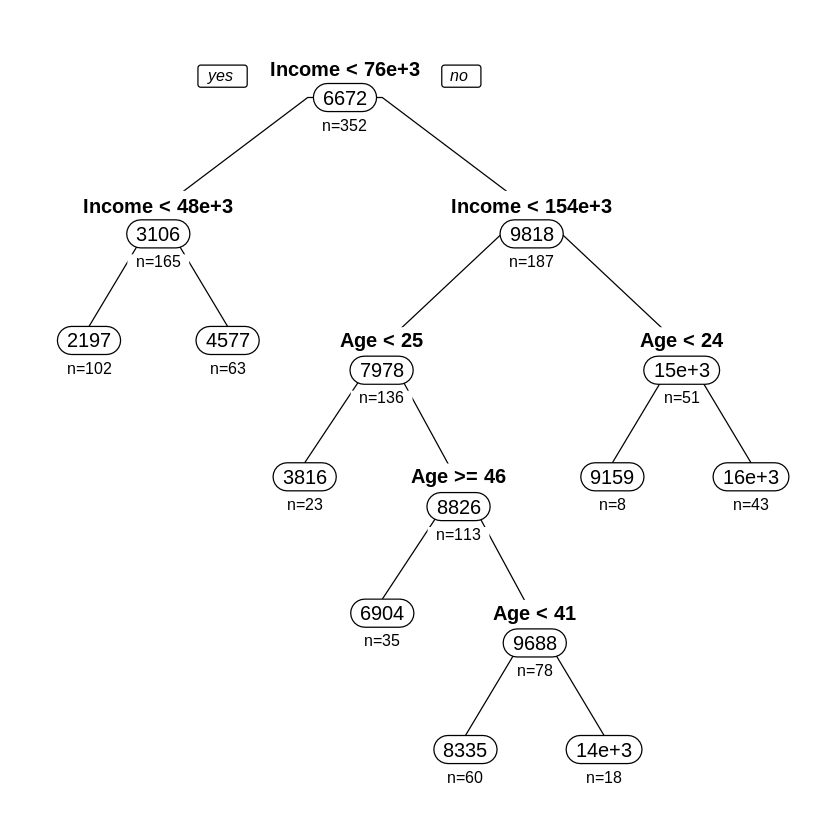

In [5]:
prp(default_tree, type=1, extra=1, under = TRUE)

To find the optimal decision tree, a common
practice is to grow the full tree and then prune it to a lesscomplex
tree based on the prediction errors produced by the
cross-validation process of the rpart function

By identifying the value of the complexity parameter (cp) associated with the
smallest cross-validated prediction error, we can create the
minimum error tree

--------------------------

We first grow the full tree by using the rpart function. We set the
options cp equal to 0, minsplit equal to 2, and minbucket equal to
1

As discussed in the classification tree section, these settings
ensure that the largest possible tree will be produced. We plot
the full tree using the prp function

Again, to ensure consistency
of the cross-validation results, we set the random seed to 1

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


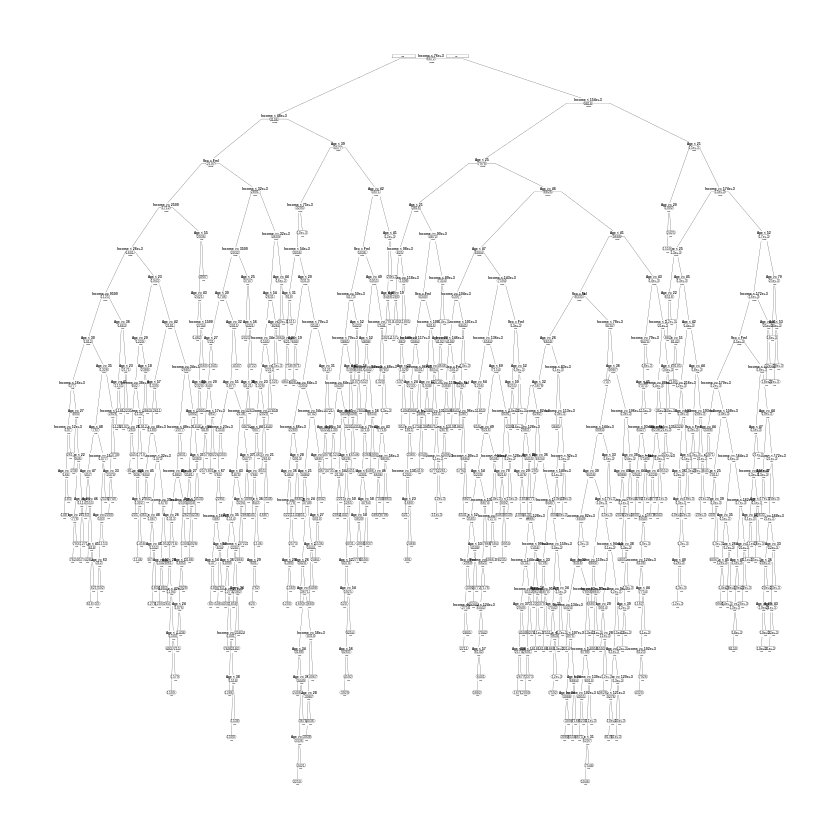

In [7]:
set.seed(1)
full_tree <- rpart(Balance ~ ., data= trainSet, method = "anova", cp=0, minsplit=2, minbucket=1)
prp(full_tree, type=1, extra=1, under = TRUE)

To identify the value of cp that is associated with the smallest
cross-validated prediction error, we use the printcp function

In [8]:
printcp(full_tree)


Regression tree:
rpart(formula = Balance ~ ., data = trainSet, method = "anova", 
    cp = 0, minsplit = 2, minbucket = 1)

Variables actually used in tree construction:
[1] Age    Income Sex   

Root node error: 1.8468e+10/352 = 52465593

n= 352 

            CP nsplit rel error  xerror    xstd
1   2.1384e-01      0 1.0000000 1.00121 0.18255
2   9.1414e-02      1 0.7861577 0.90607 0.18925
3   3.3060e-02      2 0.6947442 0.77593 0.17403
4   1.8274e-02      9 0.4627046 1.26995 0.32805
5   1.3814e-02     10 0.4444302 1.33454 0.32687
6   1.1946e-02     11 0.4306166 1.35305 0.32695
7   1.1583e-02     12 0.4186711 1.36237 0.32695
8   1.0631e-02     14 0.3955043 1.44170 0.33044
9   9.8095e-03     18 0.3529799 1.45606 0.33538
10  8.6847e-03     22 0.3127851 1.46429 0.33599
11  7.7619e-03     26 0.2780464 1.47444 0.33660
12  6.8567e-03     29 0.2547605 1.50994 0.33913
13  6.7024e-03     30 0.2479038 1.49606 0.33843
14  6.1898e-03     31 0.2412014 1.50537 0.33842
15  5.9996e-03     32 0.235011

Due to the complexity of the full tree, 273 subtree options are
displayed in the cp table

Due to the fact that complex trees tend
to overfit, in most cases, the minimum error tree is found among
the first few candidate trees

- The nsplit column
shows the number of splits for each tree

- The rel error column
shows the prediction error for each tree, relative to the
prediction error of the root node where all cases are given the
predicted balance that equals the average of all balances

- The
prediction performance of the trees is evaluated by inspecting
the cross-validation errors associated with each tree; see the
xerror column

- The third tree, with two splits, has the lowest
cross-validation error (xerror = 0.72172); therefore, it is the
minimum error tree

- The xstd column (standard error) can be
used to identify the best-pruned tree, which is the smallest tree
whose cross-validation error falls within one standard error of
the minimum error tree (0.72172 + 0.10521 = 0.82693)

In this
case, the second tree, with just one split, has a cross-validation
error of 0.78354, which is within the range; hence, the bestpruned
tree is the second tree

Let's use the prune function to create the best-pruned tree by
using the cp value associated with the second tree.

Again, to
avoid issues caused by rounding, we use a cp value that is
slightly larger than the cp value associated with the second tree
but lower than that of the next smaller tree.

In this case, we will
use 7.5219e-02. We display the pruned tree using the prp
function

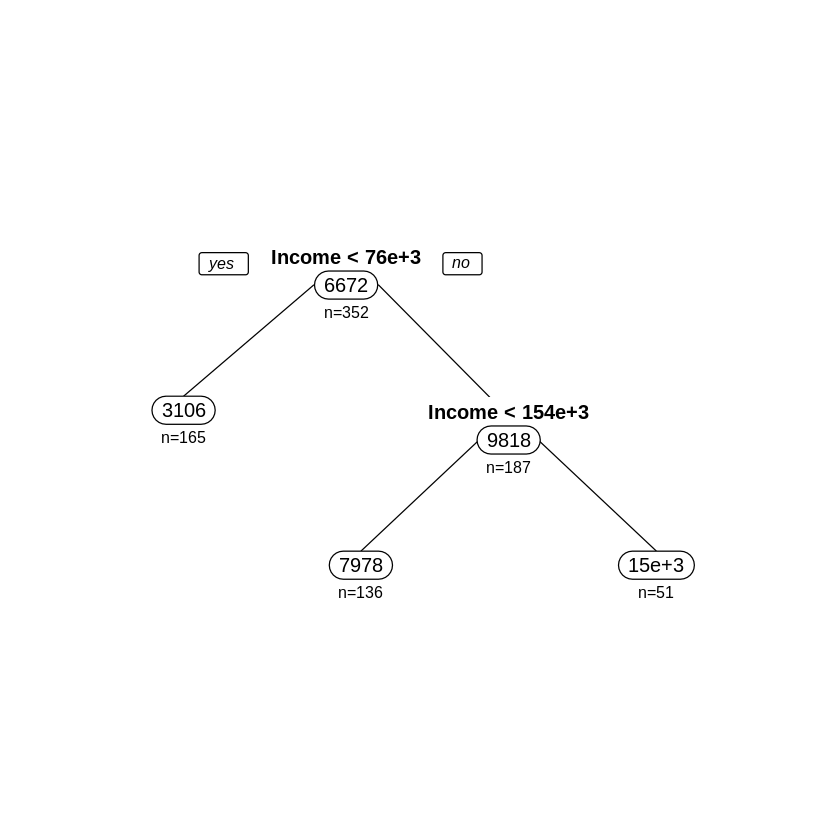

In [9]:
pruned_tree <- prune(full_tree, cp=7.5219e-02)
prp(pruned_tree, type=1, extra=1, under = TRUE)

We predict the average balances of the observations in the
validation data set using the predict function

In [10]:
predicted_value <- predict(pruned_tree, validationSet)

To evaluate the performance of our regression tree, we compute
the performance measures for prediction using the accuracy
function.

The accuracy function requires two arguments:
predicted values and actual values

In [11]:
accuracy(predicted_value, validationSet$Balance)

,ME,RMSE,MAE,MPE,MAPE
Test set,-211.4629,5120.462,3785.924,-169.8874,197.9422


Finally, to score the 20 new cases, we import the data from the
Balance_Score worksheet of the Balance data file into a data
frame (table) called myScoreData and use the predict function
to produce the predicted average checking account balance
(called predicted_value_score) for the new cases using our
regression tree

In [13]:
myScoreData <- read_excel("/content/Balance.xlsx", sheet = "Balance_Score")

predicted_value_score <- predict(pruned_tree, myScoreData)
predicted_value_score

1         2         3         4         5         6         7         8 
 3106.152 14724.902  3106.152  3106.152  3106.152  3106.152  3106.152  3106.152 
        9        10        11        12        13        14        15        16 
 3106.152  3106.152  3106.152  3106.152  3106.152  3106.152  3106.152  7978.375 
       17        18        19        20 
 7978.375  7978.375  3106.152 14724.902